In [1]:
# importing libraries
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
#import StringIO
from six import StringIO

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pydotplus
from IPython.display import Image

In [2]:
df = pd.read_csv('E:\DS\sample_user_data\sample_user_data.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,27376579751715,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,39460501403861,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,40862739425590,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,40862739425590,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,62267706107999,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


In [4]:
df.describe()

,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions
count,464704.000000,4.647040e+05,4.647040e+05,232372.0,464652.000000,231683.000000,6.308000e+03,6308.000000
mean,2.333767,2.017042e+07,1.492482e+09,1.0,3.770607,279.874622,1.617053e+08,1.046449
std,9.877242,2.006409e+02,5.279251e+06,0.0,6.402036,492.253792,9.034953e+08,0.531457
min,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000
25%,1.000000,2.017022e+07,1.487894e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000
50%,1.000000,2.017042e+07,1.492438e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000
75%,1.000000,2.017061e+07,1.497071e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,466.000000,12136.000000,4.708206e+10,25.000000


In [5]:
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'],unit='s')

In [6]:
df.head()

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,27376579751715,1,20170211,2017-02-12 02:24:53,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,39460501403861,1,20170327,2017-03-27 15:45:16,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,40862739425590,1,20170211,2017-02-11 18:09:31,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,40862739425590,2,20170211,2017-02-11 18:47:04,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,62267706107999,1,20170709,2017-07-10 00:19:20,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


In [7]:
# extracting year, month, day, hour, minute from date
df['year'] = df['visitStartTime'].dt.year
df['month'] = df['visitStartTime'].dt.month
df['day'] = df['visitStartTime'].dt.day
df['hour'] = df['visitStartTime'].dt.hour
df['minute'] = df['visitStartTime'].dt.minute

In [8]:
# if total_bounces = 1, then no transaction; else a transaction is made, so we replace NaN with 0
df['totals_bounces'].fillna(0, inplace=True)

# if totals_pageviews = NaN, there will be no transaction; else transaction is made, so we replace NaN with 0
df['totals_pageviews'].fillna(0, inplace=True)

# if totals_timeOnSite = NaN,there will be no transaction; else transaction is made, so we replace NaN with 0
df['totals_timeOnSite'].fillna(0, inplace=True)

In [9]:
# visitorid, date and device model are not required
df = df.drop(['fullVisitorId', 'date', 'device_mobileDeviceModel'], axis=1)
df.head()


,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,Affiliates,2017,7,10,0,19


In [10]:
df['geoNetwork_city'].value_counts()

not available in demo dataset    268369
Mountain View                     21564
(not set)                         16321
New York                          14588
San Francisco                     11456
                                  ...  
Kumamoto                              5
Boise                                 3
Pryor                                 3
Saratoga                              3
Bozeman                               3
Name: geoNetwork_city, Length: 436, dtype: int64

In [11]:
# replacing "not available in demo dataset" and "(not set)" by "Unavailable"
df['geoNetwork_city'].replace('not available in demo dataset', 'Unavailable', inplace=True)
df['geoNetwork_city'].replace('(not set)', 'Unavailable', inplace=True)

In [12]:
%%time

# Transaction_Amt and Transactions_Total 
for i in range(0, len(df), 1):
    if (pd.isna(df.iloc[i, 7])) and (pd.notna(df.iloc[i, 8])):
        print('ERROR: totals_totalTransactionRevenue missing when totals_transactions not null at row ', i)

    if (pd.isna(df.iloc[i, 8])) and (pd.notna(df.iloc[i, 7])):
        print('ERROR: totals_transactions missing when totals_totalTransactionRevenue is not null at row ', i)

Wall time: 1min 22s


In [13]:
# no mismatched rows from the above cell, hence replace NaN with 0
df['totals_totalTransactionRevenue'].fillna(0,inplace=True)
df['totals_transactions'].fillna(0,inplace=True)

In [14]:
df.head()

,visitNumber,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,year,month,day,hour,minute
0,1,2017-02-12 02:24:53,0.0,5.0,49.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Unavailable,Organic Search,2017,2,12,2,24
1,1,2017-03-27 15:45:16,0.0,2.0,99.0,0.0,0.0,youtube.com,referral,(not set),desktop,Windows,Unavailable,Social,2017,3,27,15,45
2,1,2017-02-11 18:09:31,0.0,2.0,14.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,9
3,2,2017-02-11 18:47:04,0.0,3.0,35.0,0.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2017,2,11,18,47
4,1,2017-07-10 00:19:20,1.0,1.0,0.0,0.0,0.0,Partners,affiliate,Data Share Promo,desktop,Windows,Unavailable,Affiliates,2017,7,10,0,19


In [15]:
# target variable 'transaction', 1 = transaction, 0 = no transaction.
df['transaction'] = np.where(df['totals_transactions']  == 0, '0', '1')
df['transaction'] = df['transaction'].astype('str')

In [16]:
# TransactionRevenue is totals_totalTransactionRevenue / 1000000
df['transactionRevenue'] = df['totals_totalTransactionRevenue'] / 1000000

In [17]:
# the following columns not needed after this stage
df = df.drop(['visitStartTime','totals_totalTransactionRevenue','year'],axis=1)
df.head()

,visitNumber,totals_bounces,totals_pageviews,totals_timeOnSite,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,month,day,hour,minute,transaction,transactionRevenue
0,1,0.0,5.0,49.0,0.0,(direct),(none),(not set),desktop,Macintosh,Unavailable,Organic Search,2,12,2,24,0,0.0
1,1,0.0,2.0,99.0,0.0,youtube.com,referral,(not set),desktop,Windows,Unavailable,Social,3,27,15,45,0,0.0
2,1,0.0,2.0,14.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,11,18,9,0,0.0
3,2,0.0,3.0,35.0,0.0,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,11,18,47,0,0.0
4,1,1.0,1.0,0.0,0.0,Partners,affiliate,Data Share Promo,desktop,Windows,Unavailable,Affiliates,7,10,0,19,0,0.0


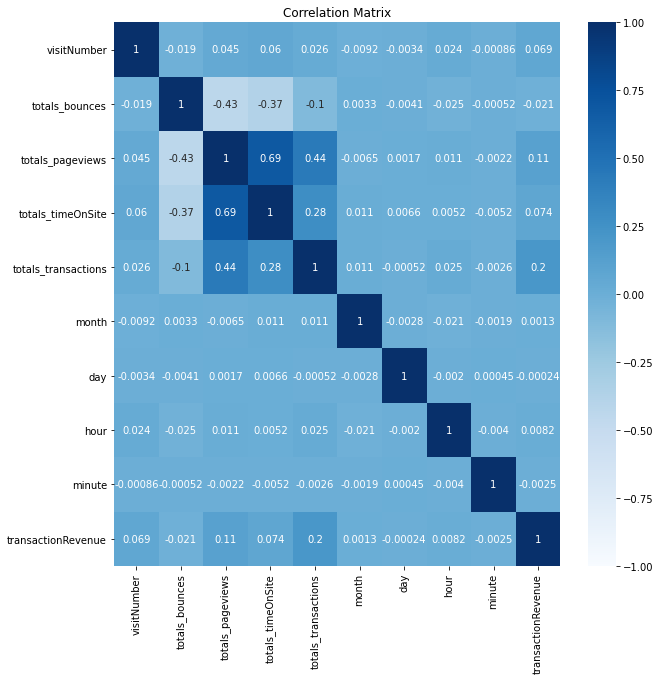

In [18]:
fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Matrix')
df.corr()
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'Blues', annot=True);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464704 entries, 0 to 464703
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   visitNumber             464704 non-null  int64  
 1   totals_bounces          464704 non-null  float64
 2   totals_pageviews        464704 non-null  float64
 3   totals_timeOnSite       464704 non-null  float64
 4   totals_transactions     464704 non-null  float64
 5   trafficSource_source    464704 non-null  object 
 6   trafficSource_medium    464704 non-null  object 
 7   trafficSource_campaign  464704 non-null  object 
 8   device_deviceCategory   464704 non-null  object 
 9   device_operatingSystem  464704 non-null  object 
 10  geoNetwork_city         464704 non-null  object 
 11  channelGrouping         464704 non-null  object 
 12  month                   464704 non-null  int64  
 13  day                     464704 non-null  int64  
 14  hour                

In [20]:
#To convert categorical variables to integer using label encoder
labEnc = LabelEncoder()

cols = ["channelGrouping", "geoNetwork_city", "device_operatingSystem", 
        "trafficSource_campaign", "trafficSource_medium", "trafficSource_source"]

col_lessLabels = ["device_deviceCategory"]

for col in cols:
    df[col] = labEnc.fit_transform(df[col])
    
df = pd.get_dummies(df, columns = col_lessLabels)

In [21]:
features = ['visitNumber', 'totals_bounces', 'totals_pageviews', 'totals_timeOnSite', 'trafficSource_source',
            'trafficSource_medium', 'trafficSource_campaign', 'device_operatingSystem', 'geoNetwork_city',
            'channelGrouping', 'month', 'day', 'hour', 'device_deviceCategory_desktop', 'device_deviceCategory_mobile']
# Features
X = df[features] 
# Target variable
y = df.transaction

In [22]:
# Split the data into training set and testing set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
%%time

# Decision Tree classifer object
clf = DecisionTreeClassifier()
# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

Wall time: 4.55 s


In [24]:
%%time

#Predict for test dataset
y_pred = clf.predict(X_test)

Wall time: 44.9 ms


In [25]:
# checking the accuracy of the model

print("Accuracy is:", metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.9812999644936035


In [26]:
# generating confusion matrix
confusion_matrix(y_test, y_pred)

array([[90754,   966],
       [  772,   449]], dtype=int64)

In [27]:
print('Recall = ', (90704 / (90704 + 956)))

Recall =  0.9895701505564041


In [28]:
print('Precision = ', (90704 / (90704 + 869)))

Precision =  0.9905103032553263


PREDICTION OF THE MODEL

True Positive = 90704 observations

True Negative = 412 observations

False Positives = 869 observations

False Negatives = 956 observations

Recall = HIGH, indicating the classes are correctly identified

Precision = HIGH, indicating the positive class is correctly identified

In [29]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 14.50
|   |--- feature_2 <= 10.50
|   |   |--- feature_2 <= 9.50
|   |   |   |--- feature_2 <= 7.50
|   |   |   |   |--- feature_2 <= 6.50
|   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |--- feature_0 <= 8.50
|   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 217.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 215.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_8 >  215.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 3.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  3.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_8 >  217.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   

In [30]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)